In [1]:
import sys 
sys.path.append('../')
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np
import torch.nn.functional as F
import scipy
import pandas as pd
import os
import glob
import scienceplots
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.style.use('science')
pd.set_option('display.float_format', lambda x: '%.4e' % x)
# import seaborn as sns
from dataset.generate_dataset_1d import poisson_kernel, logarithm_kernel
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# process green's function
idx = 257
nh = 513
h = 1/(nh-1) # x in [-1, 1]
xh = torch.linspace(0,1,nh)
x_i = torch.cartesian_prod(xh, xh).reshape(nh,nh,2)
G = poisson_kernel(x_i[...,0], x_i[...,1], h)

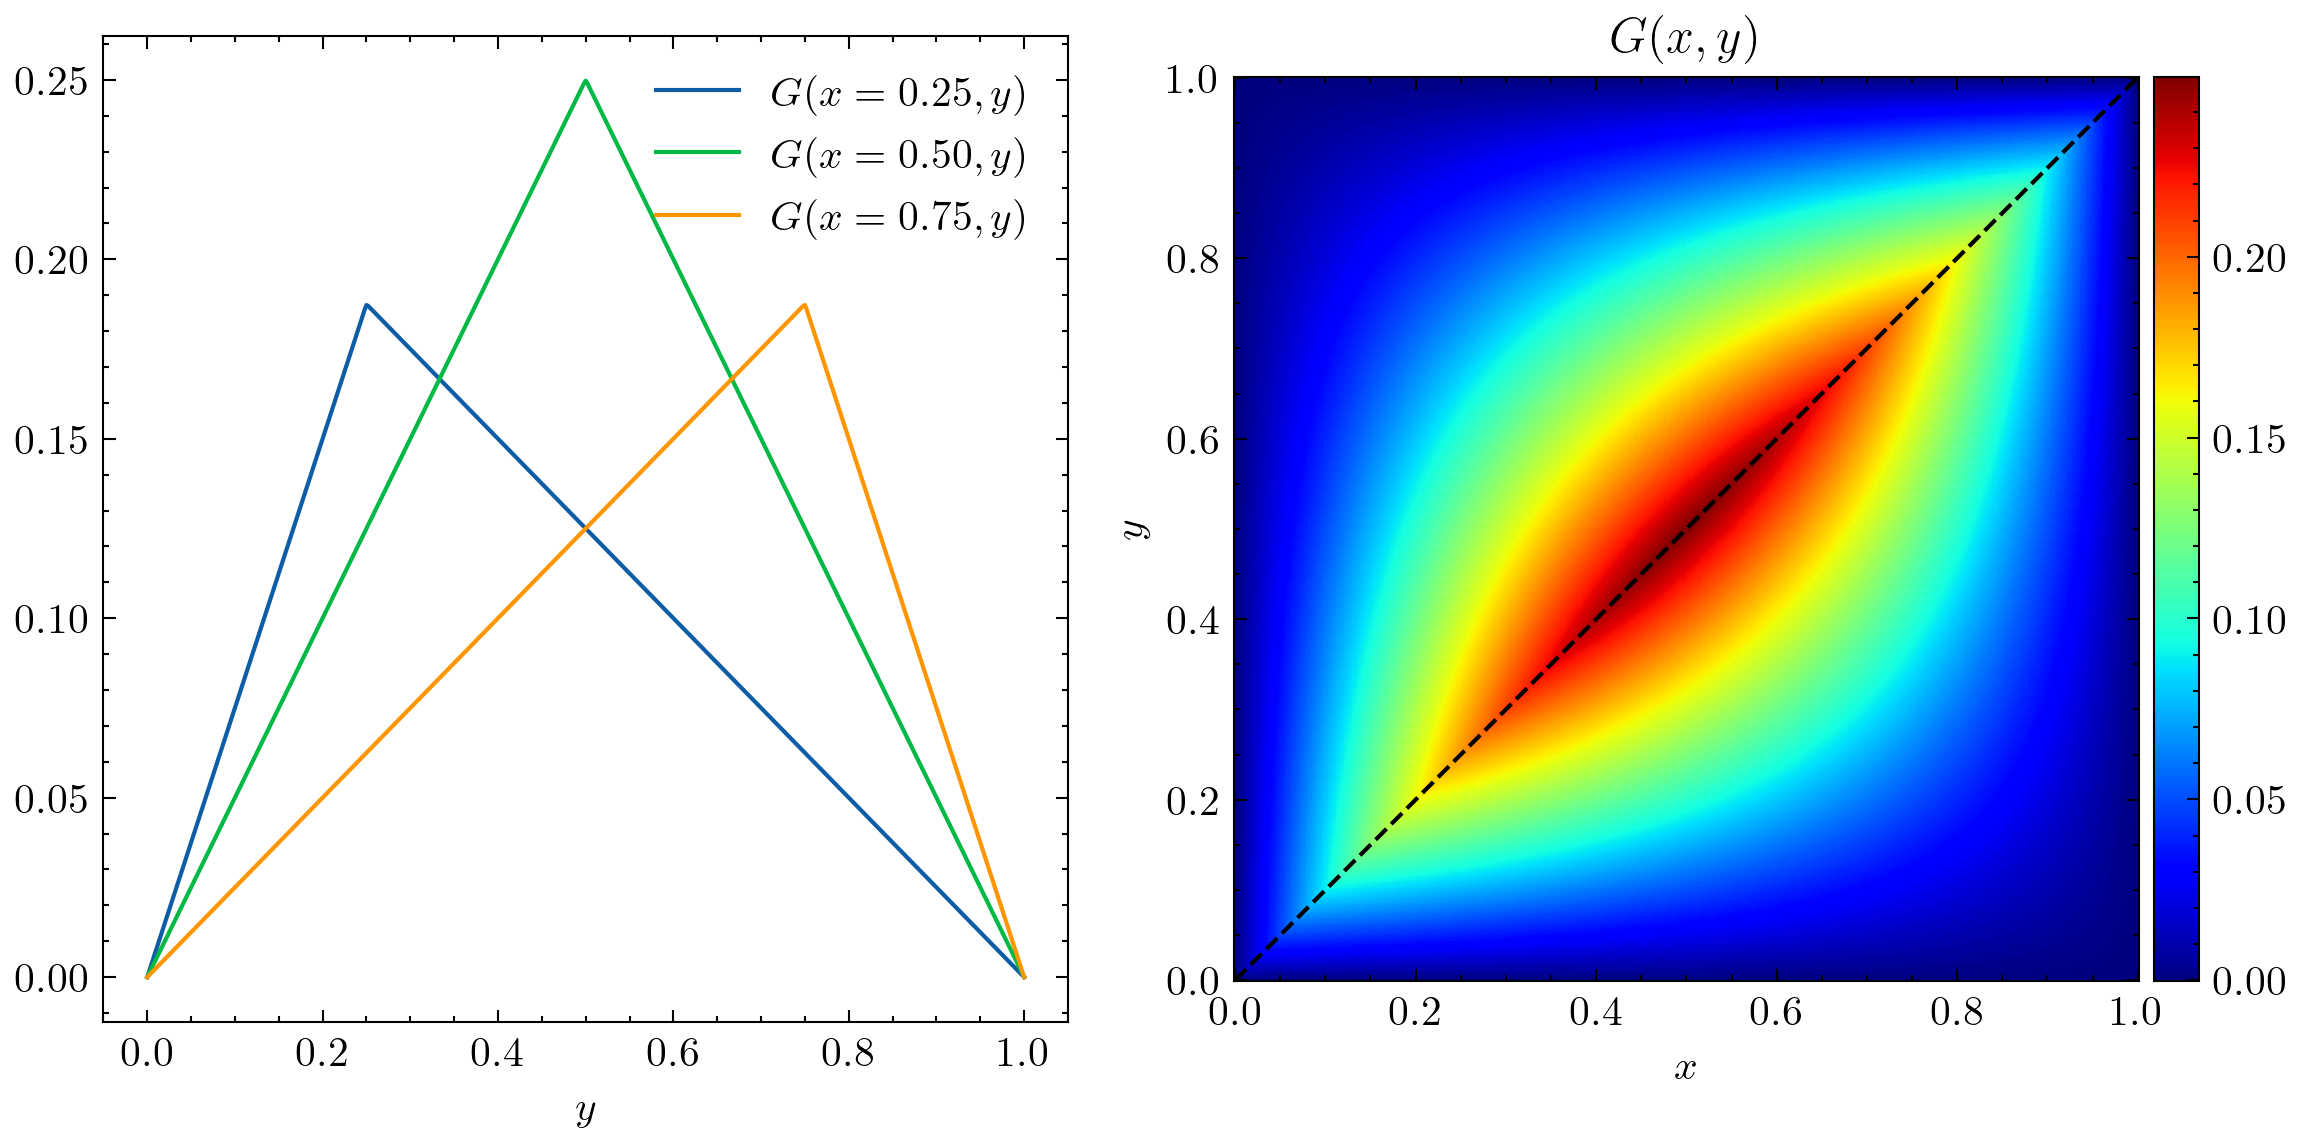

In [3]:
cm = 1/2.54
# visualize kernel slice
f = plt.figure(figsize=(20*cm,10*cm))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

# visualize kernel slice
ax1.plot(x_i[x_i[...,1]==0.25][:,0], G[x_i[...,1]==0.25], label='$G(x=0.25,y)$')
ax1.plot(x_i[x_i[...,1]==0.5][:,0], G[x_i[...,1]==0.5], label='$G(x=0.50,y)$')
ax1.plot(x_i[x_i[...,1]==0.75][:,0], G[x_i[...,1]==0.75], label='$G(x=0.75,y)$')
ax1.legend(loc='upper right')
ax1.set_xlabel('$y$')

# visualize full kernel gn
im = ax2.pcolormesh(x_i[...,0], x_i[...,1], G, cmap='jet')
ax2.plot(xh, xh, linestyle='dashed', color='k')
ax2.set_aspect('equal')
ax2.set_title('$G(x,y)$')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
f.colorbar(im, cax=cax, orientation='vertical')

plt.tight_layout()
outnm = '../vis/poisson1d_interface.png'
plt.savefig(outnm)

In [4]:
from src.ops import grid4d_coords

In [48]:
nh = 129
xh, _ = grid4d_coords(nh)
x1 = xh[:,0]
x2 = xh[:,1]
y1 = xh[:,2]
y2 = xh[:,3]
a = (x1-y1)**2+(x2-y2)**2
b = (x1*y2-x2*y1)**2+(x1*y1+x2*y2-1)**2
G = np.log(a/b)/(4*np.pi)

/tmp/ipykernel_600801/285208807.py:9: RuntimeWarning: divide by zero encountered in log
  G = np.log(a/b)/(4*np.pi)


ValueError: z array must not contain non-finite values within the triangulation

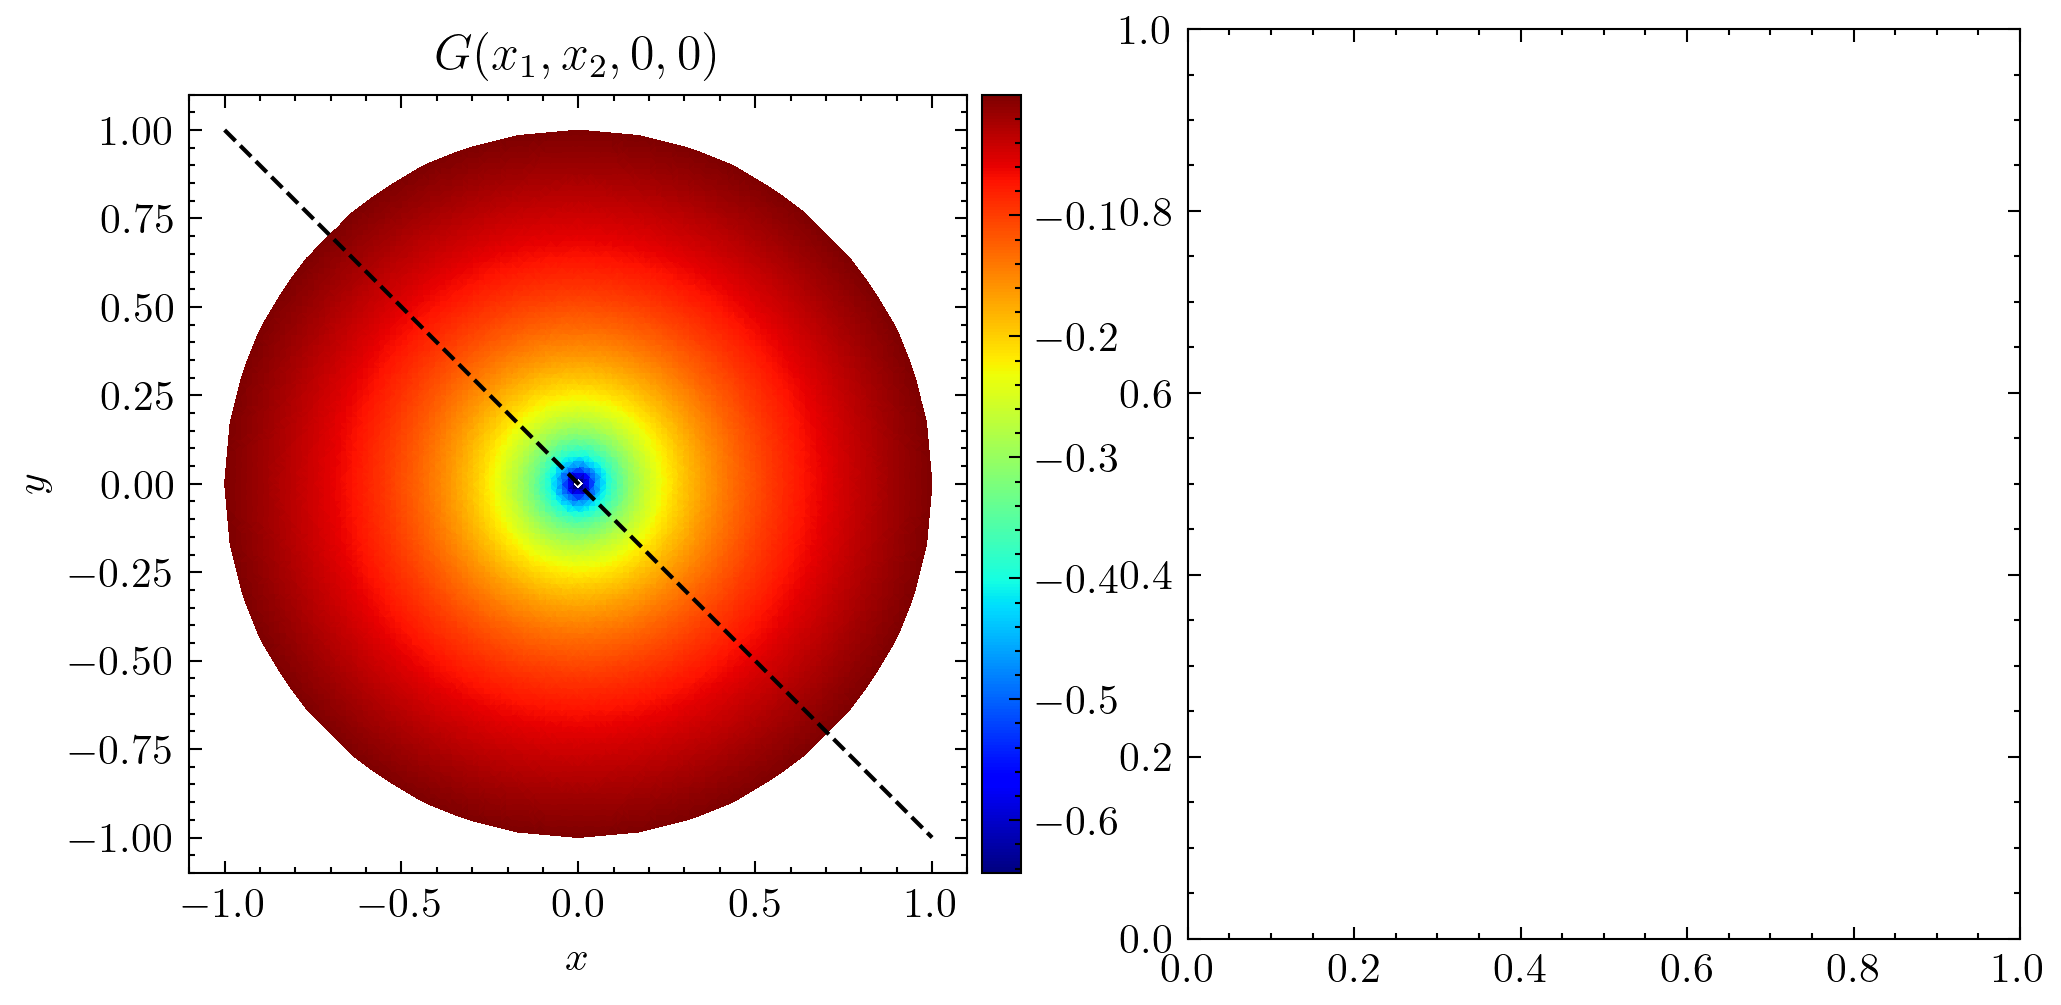

In [62]:
cm = 1/2.54
# visualize kernel slice
f = plt.figure(figsize=(20*cm,10*cm))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

# visualize kernel slice
m1 = (y1==0) & (y2==0) & ((x1**2 + x2**2) <=1) & ((y1**2 + y2**2) <=1)
im1 = ax1.tripcolor(
    x1[m1], x2[m1], G[m1], cmap='jet')
ax1.plot(
    x1[((x1-y1+x2-y2)==0) & (y1==0) & (y2==0)], 
    x2[((x1-y1+x2-y2)==0) & (y1==0) & (y2==0)], 
    linestyle='dashed', color='k')
ax1.set_aspect('equal')
ax1.set_title('$G(x_1,x_2,0,0)$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
f.colorbar(im1, cax=cax, orientation='vertical')

# visualize full kernel gn
m2 = (x2==0) & (y2==0) & ((x1**2 + x2**2) <=1) & ((y1**2 + y2**2) <=1)
im2 = ax2.tricontourf(
    x1[m2], y1[m2], G[m2], cmap='jet')
ax2.plot(
    x1[((x1-y1+x2-y2)==0) & (x2==0) & (y2==0)], 
    y1[((x1-y1+x2-y2)==0) & (x2==0) & (y2==0)], 
    linestyle='dashed', color='k')
ax2.set_aspect('equal')
ax2.set_title('$G(x_1,0,y_1,0)$')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
f.colorbar(im2, cax=cax, orientation='vertical')

plt.tight_layout()
outnm = '../vis/poisson2d_interface.png'

plt.savefig(outnm)

In [53]:
G_ = G.reshape(nh,nh,nh,nh)
mask_ = mask.reshape(nh,nh,nh,nh)

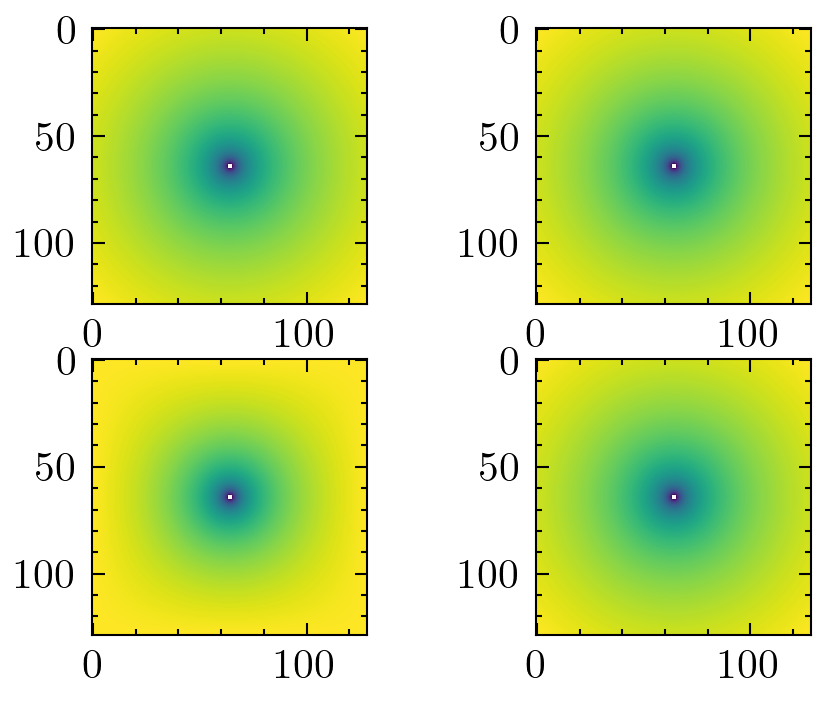

In [60]:
plt.subplot(221)
plt.imshow(G_[:,:,64,64])
plt.subplot(222)
plt.imshow(G_[64,64,:,:])
plt.subplot(223)
plt.imshow(G_[:,64,64,:])
plt.subplot(224)
plt.imshow(G_[:,:,64,64])

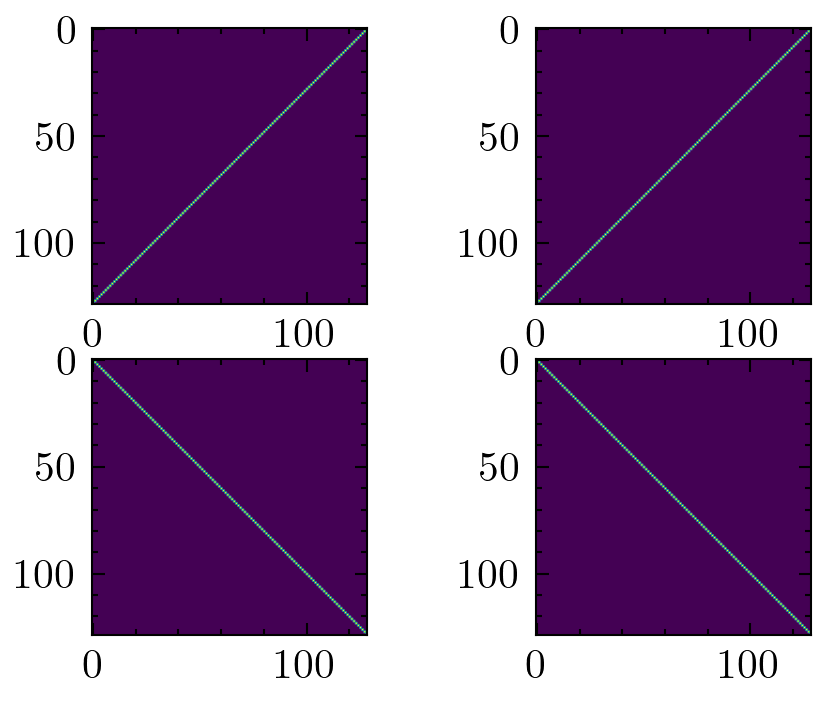

In [54]:
plt.subplot(221)
plt.imshow(mask_[:,:,64,64])
plt.subplot(222)
plt.imshow(mask_[64,64,:,:])
plt.subplot(223)
plt.imshow(mask_[:,64,:,64])
plt.subplot(224)
plt.imshow(mask_[64,:,64,:])